# Assignment 1: Part TWO (scikit-learn)

## Import libraries and read data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

sns.set()
telco = pd.read_csv('Telco-Customer-Churn.csv')
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [2]:
print(telco.keys())
print(telco.shape)
print(telco.InternetService.shape)
print(telco.Contract.tail())
print(telco.MonthlyCharges.head())

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')
(7043, 21)
(7043L,)
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, dtype: object
0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64


## Visualizing Data: Histogram

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C02DDA0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C102EF0>], dtype=object)

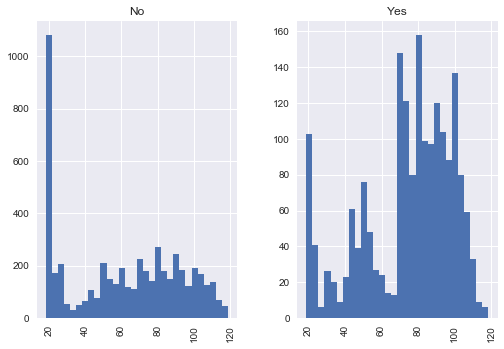

In [3]:
telco.hist(column="MonthlyCharges",by="Churn",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C45F9B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D49E1D0>], dtype=object)

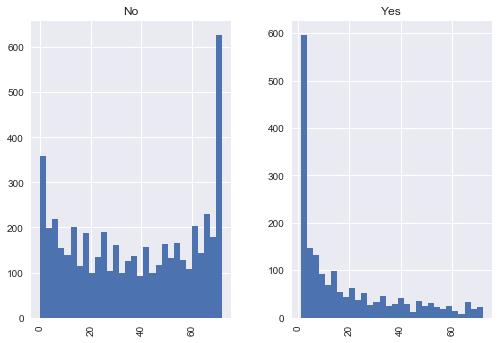

In [4]:
telco.hist(column="tenure",by="Churn",bins=30)

## Find Missing Value

In [5]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print telco.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

#Applying per row:
print "\nMissing values per row:"
print telco.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


## Pivot Table

In [6]:
#Determine pivot table
impute_grps = telco.pivot_table(values=["MonthlyCharges"], index=["gender","InternetService","Churn"], aggfunc=np.mean)
print impute_grps

                              MonthlyCharges
gender InternetService Churn                
Female DSL             No          60.540299
                       Yes         49.964612
       Fiber optic     No          94.363667
                       Yes         87.601807
       No              No          21.173661
                       Yes         20.333929
Male   DSL             No          59.891843
                       Yes         48.278958
       Fiber optic     No          93.511044
                       Yes         88.676856
       No              No          21.100069
                       Yes         20.401754


## Crosstab

In [7]:
pd.crosstab(telco["Churn"],telco["InternetService"],margins=True)

InternetService,DSL,Fiber optic,No,All
Churn,,,,
No,1962,1799,1413,5174
Yes,459,1297,113,1869
All,2421,3096,1526,7043


In [8]:
pd.crosstab(telco["Churn"],telco["PaperlessBilling"],margins=True)

PaperlessBilling,No,Yes,All
Churn,,,
No,2403,2771,5174
Yes,469,1400,1869
All,2872,4171,7043


In [9]:
pd.crosstab(telco["Churn"],telco["PaymentMethod"],margins=True)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
Churn,,,,,
No,1286,1290,1294,1304,5174
Yes,258,232,1071,308,1869
All,1544,1522,2365,1612,7043


## Visualizing Data: Boxplot

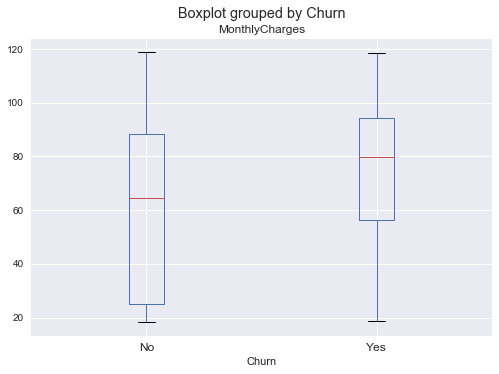

In [10]:
telco.boxplot(column="MonthlyCharges",by="Churn")

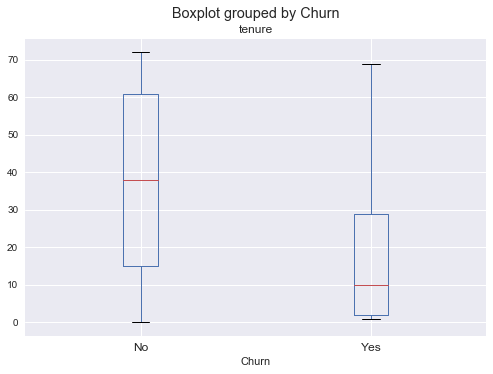

In [11]:
telco.boxplot(column="tenure",by="Churn")

## Coding Nominal Data

In [12]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding Churn as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(telco["Churn"])
telco["Churn_Coded"] = coding(telco["Churn"], {'No':0,'Yes':1})
print '\nAfter Coding:'
print pd.value_counts(telco["Churn_Coded"])

Before Coding:
No     5174
Yes    1869
Name: Churn, dtype: int64

After Coding:
0    5174
1    1869
Name: Churn_Coded, dtype: int64


## Visualizing Data: Bar Chart

Before Coding:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

After Coding:
2    3096
1    2421
0    1526
Name: InternetService_Coded, dtype: int64


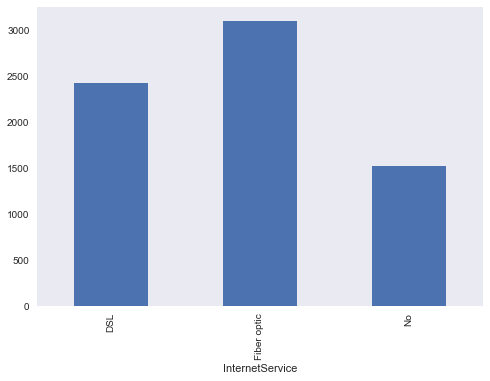

In [13]:
#Coding Churn as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(telco["InternetService"])
telco["InternetService_Coded"] = coding(telco["InternetService"], {'No':0,'DSL':1,'Fiber optic':2})
print '\nAfter Coding:'
print pd.value_counts(telco["InternetService_Coded"])

telco['InternetService'].unique()
class_group = telco.groupby('InternetService').apply(lambda x: len(x))
class_group

# Plot bar chart based on Class Label
class_group.plot(kind='bar', grid=False)

## Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

cols_to_retain = ['gender','Partner','Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

X_feature = telco[cols_to_retain]
X_dict = X_feature.T.to_dict().values()

# turn list of dicts into a numpy array
vect = DictVectorizer(sparse=False)
X_vector = vect.fit_transform(X_dict)

# print the features
# vect.get_feature_names()

# 0 to 14 is train set
X_Train = X_vector[:-1]
# 15th is test set
X_Test = X_vector[-1:] 

# Used to vectorize the class label
le = LabelEncoder()
y_train = le.fit_transform(telco['InternetService'][:-1])

## Decision Tree Classification

In [15]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Train,y_train)

In [16]:
# Predict the test data, not seen earlier
le.inverse_transform(clf.predict(X_Test))

array(['Fiber optic'], dtype=object)

In [17]:
# Prediction with the same training set
Train_predict = clf.predict(X_Train)

In [18]:
# The model predicted the training set correctly
(Train_predict == y_train).all()

True

In [19]:
# Metrics related to the DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print 'Accuracy is:', accuracy_score(y_train, Train_predict)
print classification_report(y_train, Train_predict)

Accuracy is: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2421
          1       1.00      1.00      1.00      3095
          2       1.00      1.00      1.00      1526

avg / total       1.00      1.00      1.00      7042



In [20]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=telco.Churn,class_names=telco.InternetService,filled=True, rounded=True,special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### *Managed to install pydotplus but failed to install graphviz ><

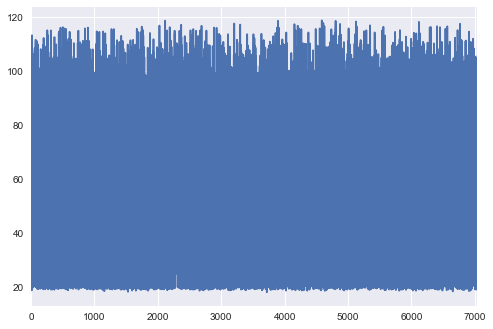

In [21]:
telco.MonthlyCharges.plot()

In [22]:
telco.corr()

,SeniorCitizen,tenure,MonthlyCharges,Churn_Coded,InternetService_Coded
SeniorCitizen,1.000000,0.016567,0.220173,0.150889,0.259390
tenure,0.016567,1.000000,0.247900,-0.352229,0.033230
MonthlyCharges,0.220173,0.247900,1.000000,0.193356,0.905491
Churn_Coded,0.150889,-0.352229,0.193356,1.000000,0.316846
InternetService_Coded,0.259390,0.033230,0.905491,0.316846,1.000000


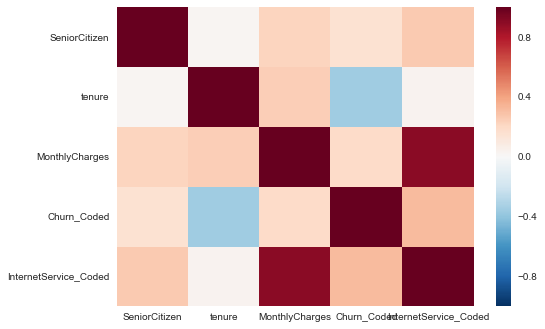

In [23]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(telco.corr())